# Ансамбли алгоритмов

*Ансамбли алгоритмов* - метод, использующий одновременно несколько обучающих алгоритмов для получения лучшего результата по сравнению с результатами каждого из алгоритмов в отдельности. Этот метод базируется на интуитивном соображении, пришедшем из статистики, согласно которому усреднение результатов наблюдений может дать более устойчивую и надежную оценку, так как ослабляет влияние различных флуктуаций в отдельных измерениях.

Большинство приемов в ансамблировании направлено на то, чтобы ансамбль был достаточно разнообразным, тогда ошибки одних алгоритмов будут компенсироваться корректной работой других.

Алгоритмы, из которых состоит ансамбль, называются базовыми алгоритмами (base learners), а алгоритм, который комбинирует полученные ответы - мета-алгоритмом (meta-estimator). По сути, при построении ансамбля:

1. повышают качество базовых алгоритмов
2. повышают разнообразие базовых алгоритмов за счет:
    - варьирования обучающей выборки (каждый алгоритм использует различные подвыборки исходной выборки)
    - варьирования признаков (каждый алгоритм использует свой рандомный набор признаков)
    - варьирования моделей (используются различные модели)
    - варьирования в модели (использование различных гиперпараметров в рамках одного алгоритма)

Вообще, существует достаточно много моделей ансамблирования: 
- голосование/усреднение ответов по независимым алгоритмам (например, *случайный лес*)
- кодировка целевых значений и сведение решения задачи к решению нескольких задач (например, каждый класс может кодироваться бинарным кодом, а решение задачи многоклассовой классификации сводиться к решению нескольких задач бинарной классификации - метод *ECOC*)
- построение суммы нескольких алгоритмов, где каждый следующий алгоритм строится с учетом ошибок предыдущих (*бустинг*)
- построение метапризнаков - ответов базовых алгоритмов на выборке, обучение на них мета-алгоритма (*стекинг*)
- однородные ансамбли (например, *нейронные сети*)

Рассмотрим одни из самые популярных методов: **бустинг** и **стекинг**.

## Boosting (Бустинг)

Главная идея бустинга - последовательное построение базовых алгоритмов, каждый из которых обучается, используя информацию об ошибках, сделанных на предыдущем этапе. Т.е. каждый следующий алгоритм мы строим таким образом, чтобы он исправлял ошибки предыдущих и повышал качество всего ансамбля. 

Первый успешный вариант бустинга - **AdaBoost (Adaptive Boosting)**. Основная идея состоит в том, что каждый следующий алгоритм строится, опираясь на объекты, неверно классифицированные предыдущими алгоритмами. Это достигается за счет того, что при построении каждого следующего алгоритма меняются веса объектов: объекты, которые классифицировались неверно, приобретают больший вес, а объекты, которые были определены правильно, - меньший. 

Подробно разбирать этот алгоритм не имеет смысла, так как его вытеснил градиентный бустинг: оказалось, что AdaBoost является его частной вариацией (что будет показано позднее).

Наглядно алгоритм AdaBoost можно представить таким образом: пусть у нас имеются два класса, которые необходимо разделить, а в качестве базовых алгоритмов мы используем деревья решений глубины 1 (т.е. одно дерево может разделить данные только одной прямой линией по горизонтали или вертикали).

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_1.png) 

После обучения первого дерева мы получаем такой результат:

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_2.png)

Видим, что веса объектов, на которых ошибся первый базовый алгоритм, увеличились, а веса тех, что были классифицированы правильно, уменьшились (на графике это передается с помощью размера точек).

После обучения второго и третьего деревьев соответственно получаем:

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_3.png)
![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_4.png)

После того, как все базовые алгоритмы были обучены, AdaBoost строит финальную модель  путем суммирования произведений веса каждого дерева на его предсказание (т.е. на то, как дерево разделило классы).

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_5.png)

Как видим, в таком варианте полученное разделение соответствует идеальной классификации.

**GradientBoosting**. Как понятно из названия, основан на понятии градиента: не вдаваясь в математические подробности, можно сказать, что градиент - это вектор, который направлен в сторону наискорейшего возрастания функции. Соответственно, антиградиент направлен в сторону наискорейшего убывания функции. 

Допустим, у нас есть выборка, состоящая из признаков *x* и целевых переменных *y*. Идея градиентного бустинга состоит в том, чтобы уменьшить ошибку предсказания классификатора $\hat{y}$, т.е. уменьшить разность $(y - \hat{y})$, чтобы она была как можно ближе к нулю. Для этой цели используется т.н. функция потерь, т.е. функция, которая характеризует потери при неправильном принятии решений (одну из них - логистическую функцию потерь - мы упоминали в одном из предыдущих уроков). Если обозначить ее как $L$, то искомую наименьшую разность можно переписать в виде $arg min_{\hat{y}}\ L(y, \hat{y})$, а поиск этой наименьшей разности производится самым простым и часто используемым методом - градиентным спуском.

Заметим, что, исходя из использования градиента, функция потерь должна быть дифференцируемой.

Теперь разберемся с тем, какие функции потерь мы можем использовать в задаче классификации. Так как оптимизировать сами метки класса довольно затруднительно, обычно используют пороговые значения, когда $\hat{y} \in \{-1, 1\}$. Наиболее известные функции потерь в классификации:
- Logistic loss или логистическая функция потерь: $L(y, \hat{y}) = log(1 + exp(-y \hat{y}))$ - самая используемая функция потерь в бинарной классификации;
- AdaBoost loss: $L(y, \hat{y}) = exp(-y \hat{y})$. Здесь нужно вспомнить про алгоритм AdaBoost: так получилось, что он эквивалентен методу градиентного бустинга с этой функцией потерь. Эта функция имеет более жесткий штраф по отношению к ошибкам классификации и используется реже.

В качестве базовых алгоритмов здесь обычно используются решающие деревья. При этом решающие деревья выбираются неглубокими: глубина варьируется от 2 до 7. Этого вполне достаточно, чтобы восстановить сложные закономерности с помощью бустинга.

Еще одна эффективная вариация градиентного бустинга на деревьях решений - **XGBoost (eXtreme Gradient Boosting)**. Модель представлена отдельной одноименной библиотекой. По сравнению с классическим градиентным бустингом, в данной реализации больше возможностей для регуляризации базовых решающих деревьев и задачи бустинга в целом. Выделяют три группы параметров:
- общие параметры, отвечающие за выбор базового алгоритма и распараллеливание;
- параметры базового алгоритма решающих деревьев: скорость обучения (чем ниже, тем больше итераций нужно для обучения модели с хорошим качеством), максимальная глубина дерева, минимальное необходимое число объектов в каждом листе, доля выборки для обучения каждого дерева, доля признаков для каждого дерева, коэффициенты перед L1- и L2-регуляризаторами функции потерь;
- параметры задачи обучения: используемая при обучении функция потерь, метрика качества на валидационной выборке, параметр воспрозводимости.

Теперь перейдем к практике. Библиотека sklearn предоставляет нам готовую реализацию алгоритмов AdaBoost и GradientBoosting, а вот XGBoost придется импортировать из другой библиотеки.

In [4]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

Все рассмотренные методы являются композициями алгоритмов. Логично предположить, что их качество будет зависеть от количества базовых алгоритмов, над которыми они строятся. Давайте на примере этих алгоритмов проанализируем, как изменяется качество алгоритма в зависимости от количества деревьев, на которых он построен.

Для демонстрации используем уже преобразованные в одном из предыдущих домашних заданий данные задачи из Kaggle - Titanic.

Вспомним, как они выглядят.

In [6]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


Сразу отделим целевую переменную Survived. На тренировочный и тестовый датасеты данные разделять не будем - сделаем проверку производительности на кросс-валидации.

In [7]:
targets = titanic.Survived
data = titanic.drop(columns='Survived')

Зададим количество деревьев в алгоритме: 1, а далее от 10 до 100 с шагом 10. В алгоритме за этот гиперпараметр отвечает n_estimtors.

In [8]:
trees = [1] + list(range(10, 100, 10))

Теперь последовательно обучим алгоритмы AdaBoost, GradientBoosting и XGBoost и проверим на трехкратной кросс-валидации, как изменяется точность классификаторов в зависимости от количества базовых алгоритмов. Заодно посмотрим на время обучения каждого из алгоритмов.

In [9]:
%%time

ada_scoring = []
for tree in trees:
    ada = AdaBoostClassifier(n_estimators=tree)
    score = cross_val_score(ada, data, targets, scoring='roc_auc', cv=3)
    ada_scoring.append(score)
ada_scoring = np.asmatrix(ada_scoring)

CPU times: user 2.1 s, sys: 0 ns, total: 2.1 s
Wall time: 2.17 s


In [10]:
ada_scoring

matrix([[0.77164222, 0.78587863, 0.7430975 ],
        [0.79997124, 0.85557473, 0.86624005],
        [0.80560349, 0.85092513, 0.88447896],
        [0.79925223, 0.84766561, 0.88562937],
        [0.80236794, 0.84502924, 0.87553926],
        [0.80059438, 0.8420094 , 0.87553926],
        [0.80040265, 0.84112262, 0.88050043],
        [0.80136133, 0.84210526, 0.88203432],
        [0.80299108, 0.84385486, 0.87340619],
        [0.8038539 , 0.84450197, 0.87824753]])

In [11]:
%%time

gbc_scoring = []
for tree in trees:
    gbc = GradientBoostingClassifier(n_estimators=tree)
    score = cross_val_score(gbc, data, targets, scoring='roc_auc', cv=3)
    gbc_scoring.append(score)
gbc_scoring = np.asmatrix(gbc_scoring)

CPU times: user 1.31 s, sys: 0 ns, total: 1.31 s
Wall time: 1.35 s


In [13]:
gbc_scoring

matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88677979],
        [0.83158374, 0.87364586, 0.88179465],
        [0.81708369, 0.8781996 , 0.8825616 ],
        [0.81782667, 0.87374173, 0.88186655],
        [0.81451922, 0.87098552, 0.88730707],
        [0.81413575, 0.86930783, 0.88349631],
        [0.80998945, 0.86983511, 0.88126738],
        [0.80982169, 0.8715128 , 0.87635414],
        [0.81380021, 0.87192024, 0.87496405]])

In [17]:
%%time

import pandas as pd
xgb_scoring = []
for tree in trees:
    xgb = XGBClassifier(n_estimators=tree, use_label_encoder=False)
    score = cross_val_score(xgb, data, targets, scoring='roc_auc', cv=3)
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be rem

[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be rem

[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be rem

[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be rem

[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:42:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:42:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 3.21 s, sys: 395 ms, total: 3.61 s
Wall time: 2.88 s


In [18]:
xgb_scoring

matrix([[0.8108283 , 0.86564088, 0.87714505],
        [0.80967788, 0.89497651, 0.86614419],
        [0.81658039, 0.88625252, 0.86156648],
        [0.8127936 , 0.88191449, 0.8582111 ],
        [0.81324897, 0.87800786, 0.85694085],
        [0.81125971, 0.87865497, 0.85698878],
        [0.81056466, 0.87760042, 0.85646151],
        [0.81032499, 0.87386157, 0.86183012],
        [0.80816796, 0.8758748 , 0.85881028],
        [0.80792829, 0.87395743, 0.85665325]])

На первый взгляд алгоритмы работают практически идентично. Теперь посмотрим на графике, так ли это. Обратите внимание на то, что алгоритм XGBoost работает в 2 раза быстрее, чем GradienBoosting, и почти в 4 раза быстрее, чем AdaBoost.

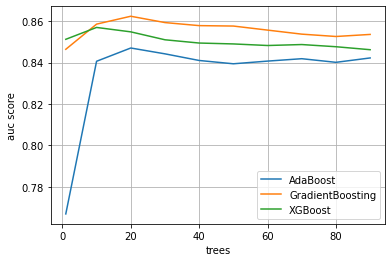

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(trees, ada_scoring.mean(axis=1), label='AdaBoost')
plt.plot(trees, gbc_scoring.mean(axis=1), label='GradientBoosting')
plt.plot(trees, xgb_scoring.mean(axis=1), label='XGBoost')
plt.grid(True)
plt.xlabel('trees')
plt.ylabel('auc score')
plt.legend(loc='lower right')

Видим ожидаемую картину: при одном дереве качество работы алгоритма было ниже, чем с увеличением количества деревьев, однако все модели показывают наиболее высокое качество примерно у отметки в 20 базовых деревьев. Вообще, в бустинге увеличение числа деревьев не всегда приводит к улучшению качества решения на тестовых данных. Число деревьев, при котором качество алгоритма максимально, зависит от темпа обучения: чем меньше темп, тем больше деревьев обычно нужно (отметим, что зависимость нелинейная).

Также, как видно по графику, алгоритм XGBoost работает не только быстрее, но и несколько лучше. Это достигается за счет того, что у него больше преднастроенных гиперпараметров и он лучше оптимизирован.

## Stacking

Теперь поговорим о стекинге - другом популярном способе ансамблирования алгоритмов. Он принципиально отличается от бустинга двумя положениями. Первое, в стекинге обычно используются разнородные базовые алгоритмы (например, kNN, метод опорных векторов и дерево решений), тогда как в бустинге обычно используют ансамбли однородных алгоритмов (обычно применяются деревья решений). Второе, стекинг объединяет базовые алгоритмы, используя мета-алгоритм, который самостоятельно обучается на предоставленных базовыми моделями данных. Бустинг в свою очередь объединяет их, следуя детерминированному алгоритму.

Идея стекинга лежит на поверхности. Известно, что, если обучить несколько разных алгоритмов, то в задаче регрессии их среднее, а в задаче классификации — голосование по большинству, часто превосходят по качеству все эти алгоритмы по отдельности. Возникает вопрос: почему, собственно, нужно использовать для ансамблирования такие операции как усреднение или голосование? Можно же доверить ансамблироование очередному алгоритму (т.н. мета-алгоритму) машинного обучения, чтобы он сам решил, как ему действовать с полученными ответами базовых алгоритмов.

Чтобы понять, как работает классический стекинг, сначала разберем его простейшую реализацию - **блендинг (blending)**. Обучающую выборку делят на две части. 

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/blending_1.png)

На первой обучают базовые алгоритмы. Затем получают их ответы на второй части и на тестовой выборке. 

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/blending_2.png)

Понятно, что  ответ каждого алгоритма можно рассматривать как новый признак (т.н. метапризнак). На метапризнаках второй части обучения настраивают метаалгоритм. Затем запускают его на метапризнаках теста и получают ответ.

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/blending_3.png)

В такой реализации самый большой недостаток - деление обучающей выборки. Получается, что ни базовые алгоритмы, ни метаалгоритм не используют всего объёма обучения, а значит, мы можем пропустить важные данные.

Один из способов борьбы за использование всей обучающей выборки - реализация классического **стекинга (stacking)**. Понятно, что обучить базовые алгоритмы на всей обучающей выборке и потом для той же выборки построить метапризнаки нельзя: будет очевидное переобучение. Поэтому выборку разбивают на части (т.н. фолды, как в кросс-валидации).

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/meta_1.png)

Затем последовательно для каждого обучают базовые алгоритмы на всех фолдах, кроме одного, а на оставшемся получают ответы базовых алгоритмов и трактуют их как значения соответствующих метапризнаков на этом фолде.

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/meta_2.png)

Для получения метапризнаков объектов тестовой выборки базовые алгоритмы обучают на всей тренировочной выборке и берут их ответы на тестовой.

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/meta_3.png)

Для примера, если взять M базовых алгоритмов и обучить их на N объектах, то окончательная матрица метапризнаков для обучения мета-алгоритма будет выглядеть так:
![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/meta_mtrx.png)

Отметим, что стекинг не всегда существенно повышает качество лучшего из базовых алгоритмов, однако если этот алгоритм убрать из базовых, то и качество стекинга не сильно падает.

Также возможно использовать стекинг с несколькими слоями, т.н. многоуровневый стекинг, т.е. ввести понятие мета-мета признака и мета-мета алгоритма и далее при желании расширить еще на несколько слоев. Такой метод часто применяется в соревнованиях по машинному обучению, где борьба идет за десятитысячные доли к точности модели, однако саму модель это сделает неинтерпретируемой, что плохо для бизнес-задач.

Вообще, в sklearn нет реализации стекинга, но существуют такие небазовые пакеты python как mlxtend или vecstack, в которых присутствует этот метод, которым можно воспользоваться "из коробки".

Мы же на примере базовой реализации блендинга покажем, как работает этот метод. В качестве базовых алгоритмов возьмем kNN, LogisticRegression, DesisionTreeClassifier и SupportVectorClassification, а в качестве мета-алгоритма будем использовать XGBoost.

Будем проверять работу стекинга на том же преобразованном датасете Titanic.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

In [21]:
titanic = pd.read_csv('titanic.csv')
targets = titanic.Survived
data = titanic.drop(columns='Survived')

x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    targets,
                                                    train_size=0.8,
                                                    random_state=0)

Так как нам нужно и обучить базовые алгоритмы на тренировочном сете, и сделать на этих же данных предсказания для обучения мета-алгоритма, разделим тренировочные данные еще на два датасета: train и valid.

In [22]:
train, valid, train_true, valid_true = train_test_split(x_train, 
                                                        y_train,
                                                        train_size=0.5,
                                                        random_state=0)

Обучим базовые алгоритмы.

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(train, train_true)

lr = LogisticRegression(random_state=17)
lr_model = lr.fit(train, train_true)

dtc = DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)
dtc_model = lr.fit(train, train_true)

svc = SVC(random_state=17)
svc_model = svc.fit(train, train_true)

/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Теперь получим предсказания моделей для второй части тренировочных данных - valid, заполним получившимися метапризнаками матрицу для обучения мета-алгоритма и обучим его.

Заодно получим для каждого базового алгоритма метрику AUC для тестовых данных, которая покажет качество работы каждого алгоритма в отдельности.

In [24]:
models = [knn_model, lr_model, dtc_model, svc_model]
meta_mtrx = np.empty((valid.shape[0], len(models))) # (кол-во объектов, 4 алгоритма)

for n, model in enumerate(models):
    meta_mtrx[:, n] = model.predict(valid)
    predicted = model.predict(x_test)
    print(f'{n} auc: {roc_auc_score(y_test, predicted)}')
    
meta = XGBClassifier(n_estimators=40)
meta_model = meta.fit(meta_mtrx, valid_true)

0 auc: 0.7080368906455863
1 auc: 0.8094861660079051
2 auc: 0.8094861660079051
3 auc: 0.6538866930171279
[18:00:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Получим метапризнаки базовых алгоритмов для тестовых данных, чтобы мета-алгоритм мог по ним сделать предсказания.

In [25]:
meta_mtrx_test = np.empty((x_test.shape[0], len(models))) 

for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(x_test)
    
meta_predict = meta.predict(meta_mtrx_test)
print(f'Stacking AUC: {roc_auc_score(y_test, meta_predict)}')

Stacking AUC: 0.8094861660079051


Как мы видим, в этом случае финальный скор AUC не превышает результат лучших базовых алгоритмов. Попробуем убрать базовые алгоритмы с лучшими результатами и посмотреть, что изменится.

In [26]:
models = [knn_model, svc_model]
meta_mtrx = np.empty((valid.shape[0], len(models))) # (кол-во объектов, 4 алгоритма)

for n, model in enumerate(models):
    meta_mtrx[:, n] = model.predict(valid)
    predicted = model.predict(x_test)
    print(f'{n} auc: {roc_auc_score(y_test, predicted)}')

meta_model = meta.fit(meta_mtrx, valid_true)

meta_mtrx_test = np.empty((x_test.shape[0], len(models))) 

for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(x_test)
    
meta_predict = meta.predict(meta_mtrx_test)
print(f'Stacking AUC: {roc_auc_score(y_test, meta_predict)}')

0 auc: 0.7080368906455863
1 auc: 0.6538866930171279
[18:01:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Stacking AUC: 0.6538866930171279


/home/roman/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Здесь же видно, что стекинг двух не самых лучших базовых алгоритмов дает результат выше, чем у каждого из них по отдельности.